### This script contains the following:  

1. Importing libraries and data and renaming columns  
2. Standadizing the data  
3. The elbow technique  
4. k-means clustering  

#### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# create a path
path = r'/Users/macbook/Library/CloudStorage/OneDrive-Personal/Data Analisys/Boat Sales'

In [4]:
# load data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = 0)

In [5]:
df.head()

Boat Type            Manufacturer                 Type  \
1   Center console boat       Terhi power boats  new boat from stock   
4          Fishing Boat      Linder power boats  new boat from stock   
10         Fishing Boat       Terhi power boats   Used boat,Electric   
12           Sport Boat  GS Nautica power boats            Used boat   
13             Runabout      Kimple power boats  new boat from stock   

    Year Built  Length  Width       Material  Number of views last 7 days  \
1         2020    4.00   1.50  Thermoplastic                           75   
4         2019    3.55   1.46      Aluminium                           58   
10        1987    4.35   1.75            GRP                          239   
12        2004    4.70   2.00            GRP                           69   
13        2020    4.40   1.65      Aluminium                          113   

    EUR Price       Country            City Pricing Category Boat Class  \
1      3490.0      Germany    BÃ¶nningstedt       Low-priced    Class A   
4      3399.0      Germany          Bayern        Low-priced    Class A   
10     3570.0  Switzerland          Seengen       Low-priced    Class A   
12     3500.0        Italy      Lake Garda        Low-priced    Class A   
13     4692.0  Switzerland        Zugersee        Low-priced    Class A   

    Total_views  
1        203469  
4        203469  
10       316879  
12       116749  
13       316879

#### Data Cleaning

In [6]:
# Rename the columns.
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [7]:
df = df[['Length','Width','7days_views','EUR Price']]

In [8]:
df

Length  Width  7days_views  EUR Price
1       4.00   1.50           75    3490.00
4       3.55   1.46           58    3399.00
10      4.35   1.75          239    3570.00
12      4.70   2.00           69    3500.00
13      4.40   1.65          113    4692.00
...      ...    ...          ...        ...
9877    7.20   2.70         1299    5100.00
9878    6.00   2.10         1917    5098.98
9882    6.00   1.62          288    5049.00
9885    4.40   1.80          354    4499.00
9887    3.60   1.60          194    3855.60

[6001 rows x 4 columns]

#### 2. Standadizing the data

In [9]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36246306]
 [-1.50289423 -1.8047781  -0.62569917 -0.36260574]
 [-1.33784374 -1.53402117  0.43094436 -0.36233764]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.36001879]
 [-1.32752808 -1.48733894  1.10229246 -0.3608811 ]
 [-1.49257857 -1.67406786  0.16824293 -0.36188986]]


In [10]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  7days_views  EUR Price
0    -1.410053 -1.767432    -0.526456  -0.362463
1    -1.502894 -1.804778    -0.625699  -0.362606
2    -1.337844 -1.534021     0.430944  -0.362338
3    -1.265634 -1.300610    -0.561483  -0.362447
4    -1.327528 -1.627386    -0.304620  -0.360579
...        ...       ...          ...        ...
5996 -0.749851 -0.647059     6.619022  -0.359939
5997 -0.997427 -1.207246    10.226789  -0.359940
5998 -0.997427 -1.655395     0.716997  -0.360019
5999 -1.327528 -1.487339     1.102292  -0.360881
6000 -1.492579 -1.674068     0.168243  -0.361890

[6001 rows x 4 columns]


#### 3. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-24003.999999999996,
 -15675.36192161695,
 -11918.668949738849,
 -9074.458411620653,
 -7104.894033161082,
 -6078.011136244072,
 -5350.481543338646,
 -4639.07797348004,
 -4125.114510314226]

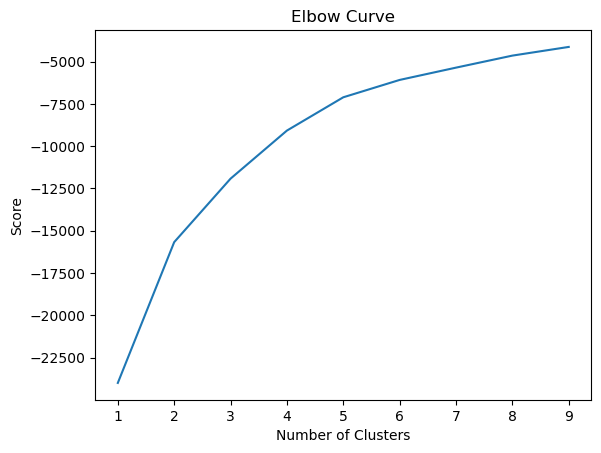

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The is a noticable straighten line on the x-axis after 5. Therefore, the optimal count for clusters is five.

#### 4. k-means clustering

In [14]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=5)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

In [17]:
df.head()

Length     Width  7days_views  EUR Price  clusters
0 -1.410053 -1.767432    -0.526456  -0.362463         0
1 -1.502894 -1.804778    -0.625699  -0.362606         0
2 -1.337844 -1.534021     0.430944  -0.362338         0
3 -1.265634 -1.300610    -0.561483  -0.362447         0
4 -1.327528 -1.627386    -0.304620  -0.360579         0

In [18]:
df['clusters'].value_counts()

0    2920
1    2233
2     496
3     322
4      30
Name: clusters, dtype: int64

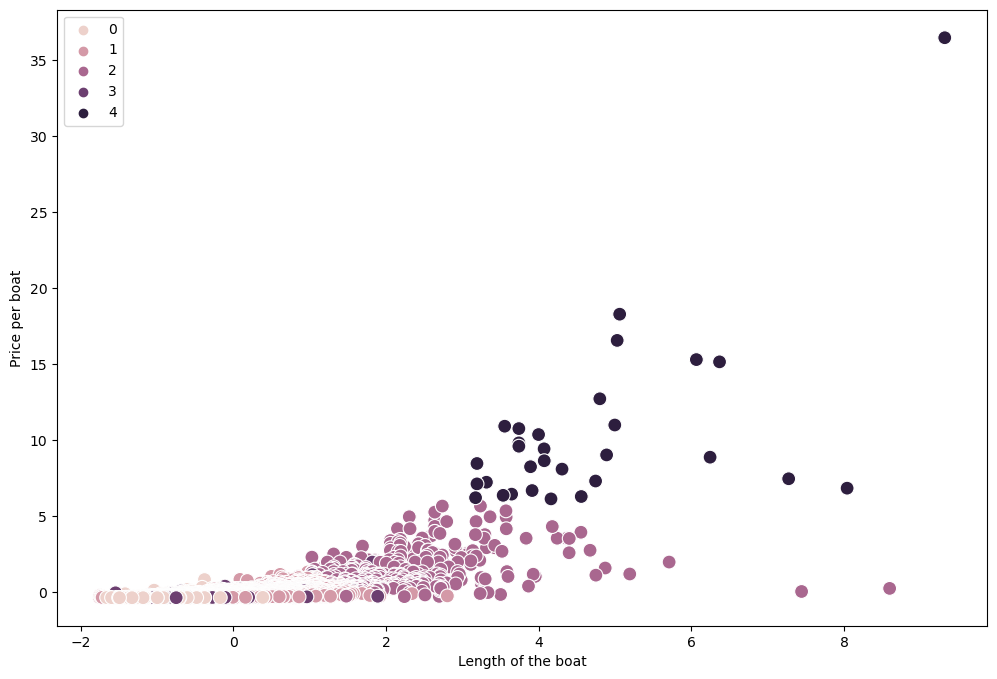

In [19]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['EUR Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

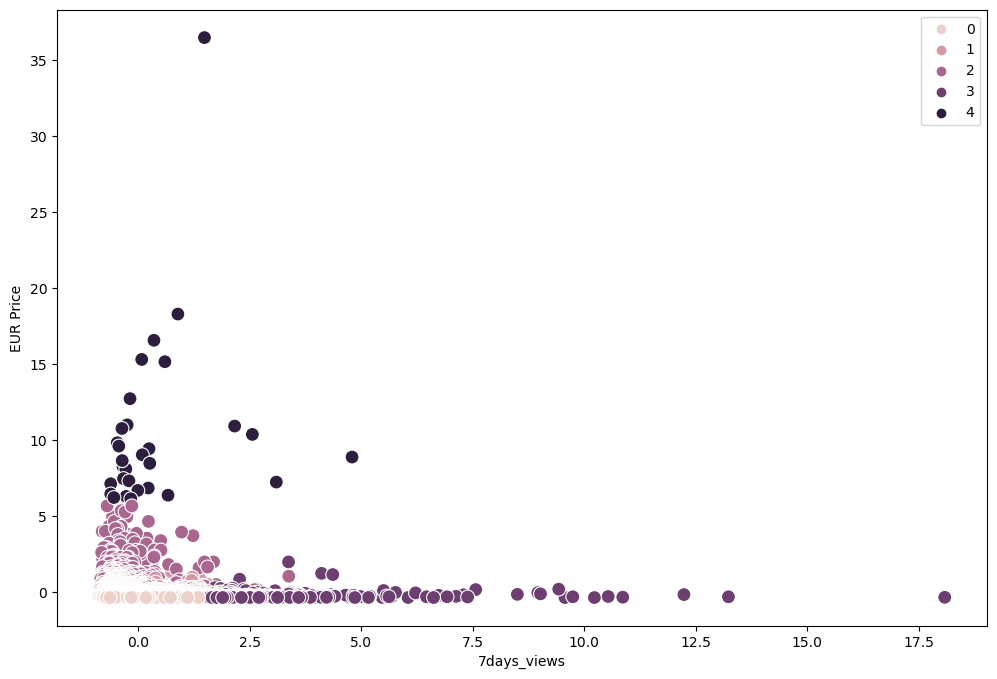

In [20]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['7days_views'], y=df['EUR Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('7days_views') 
plt.ylabel('EUR Price') 
plt.show()

#### Explaining the graph
The two graphs does not entirely makes sense or give a great insight to the relationship between the cost of the boat and either of the Length or Views of each boat. This gives a suggestion that there are other important factors that are inclusively and would all together be determinant of the boat price

In [21]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dent purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'whitish purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'whitish pink'

In [22]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         '7days_views':['mean', 'median'],
                          'EUR Price':['mean', 'median']})

Length               Width           7days_views            \
                    mean    median      mean    median        mean    median   
cluster                                                                        
dark purple     4.686912  4.116043  3.758810  3.451641    0.398253 -0.091540   
dent purple    -0.528116 -0.646695 -0.545605 -0.749760    3.052774  2.418719   
purple          2.104836  1.923967  1.915720  1.715062   -0.349769 -0.470997   
whitish pink   -0.682330 -0.692084 -0.741082 -0.787105   -0.050967 -0.170350   
whitish purple  0.437910  0.397250  0.571734  0.566679   -0.301224 -0.398025   

                EUR Price            
                     mean    median  
cluster                              
dark purple     10.398493  8.764783  
dent purple     -0.240710 -0.309532  
purple           1.221071  0.886187  
whitish pink    -0.269221 -0.292346  
whitish purple  -0.024170 -0.077883

#### Explanations
The data does not provide a deep understanding of the relationship between the columns. However, the whitish purple cluster showed the best statistics of all lots. The average number of lengths, widths and prices is the highest and significantly higher than the other four. This is because the length and width determine the size of the boat, and this may be proportional to the price. In general, there are other important variables to consider when evaluating the price of boats.
This analysis provided a deeper understanding of the need to further explore other categorical variables in the data frame to discover the actual determinant of value or views received by each boat.

In [23]:
# Export data to pkl
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_clasters.csv'))